This notebook contains all essentails statistic topics discussed on our Intro to Data Science Course. Note that many of these concepts are extensive, so to fully understand them you need to spend time on them yourself.

#TODO

- krotkie wprowadzenie
- zmienne losowe
- rozklady
- wartosc oczekiwana odchylenie 
- istotnosc, srednia, przedzialy ufnosci
- kowariancja, korelacja
- jak interpretowac korelacje
- Probkowanie
- Testy statystyczne

### Quick introduction

Statistics is the disciplin that concerns the collection, organization, analysis, interpretation, and presentation of data.

On previous lessons, we talked about organization and presentation of data. Now, it is time to discuss interpretation and analysis in slightly more technical way.

### Random Variable

A **random variable** is a numerical outcome that results from a random phenomenon. Formally, a random variable $ X $ is a measurable function $X: \Omega \rightarrow \mathbb{R}$, where $ \Omega $ represents the sample space, and $ \mathbb{R} $ represents the real numbers. However, practically, it's a variable that can take on different values, each with an associated probability.

Random variables are typically denoted by capital letters such as $X$, $Y$, or $Z$. The specific values a random variable can take are represented by lowercase letters like $x$, $y$, or $z$.

There are two main types of random variables:
- **Discrete random variable**: Can only take distinct, separate values (e.g., points on a number line).
- **Continuous random variable**: Can take any value within a given range or interval, covering real numbers (e.g., a segment on the real line).

### Probability Distribution

The **distribution** of a random variable describes how its possible values are distributed, or how likely each value is to occur.

For a **discrete random variable**, the probability distribution consists of a set of pairs $(x_i, p_i)$, where:
- $x_i$ represents a specific value the random variable $X$ can take.
- $p_i$ is the probability that $X = x_i$, i.e., the likelihood that the random variable takes the value $x_i$.

In other words, the probability distribution provides a complete description of the random variable's behavior.

### Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)**, denoted by $F(x)$, is the probability that the random variable $X$ takes a value less than or equal to $x$. Mathematically, it is defined as:

$$
F(x) = P(X \leq x)
$$

This function provides a cumulative measure of probabilities up to a given value of $x$, allowing us to understand the likelihood that the random variable falls within a certain range.


### Examples of Distributions

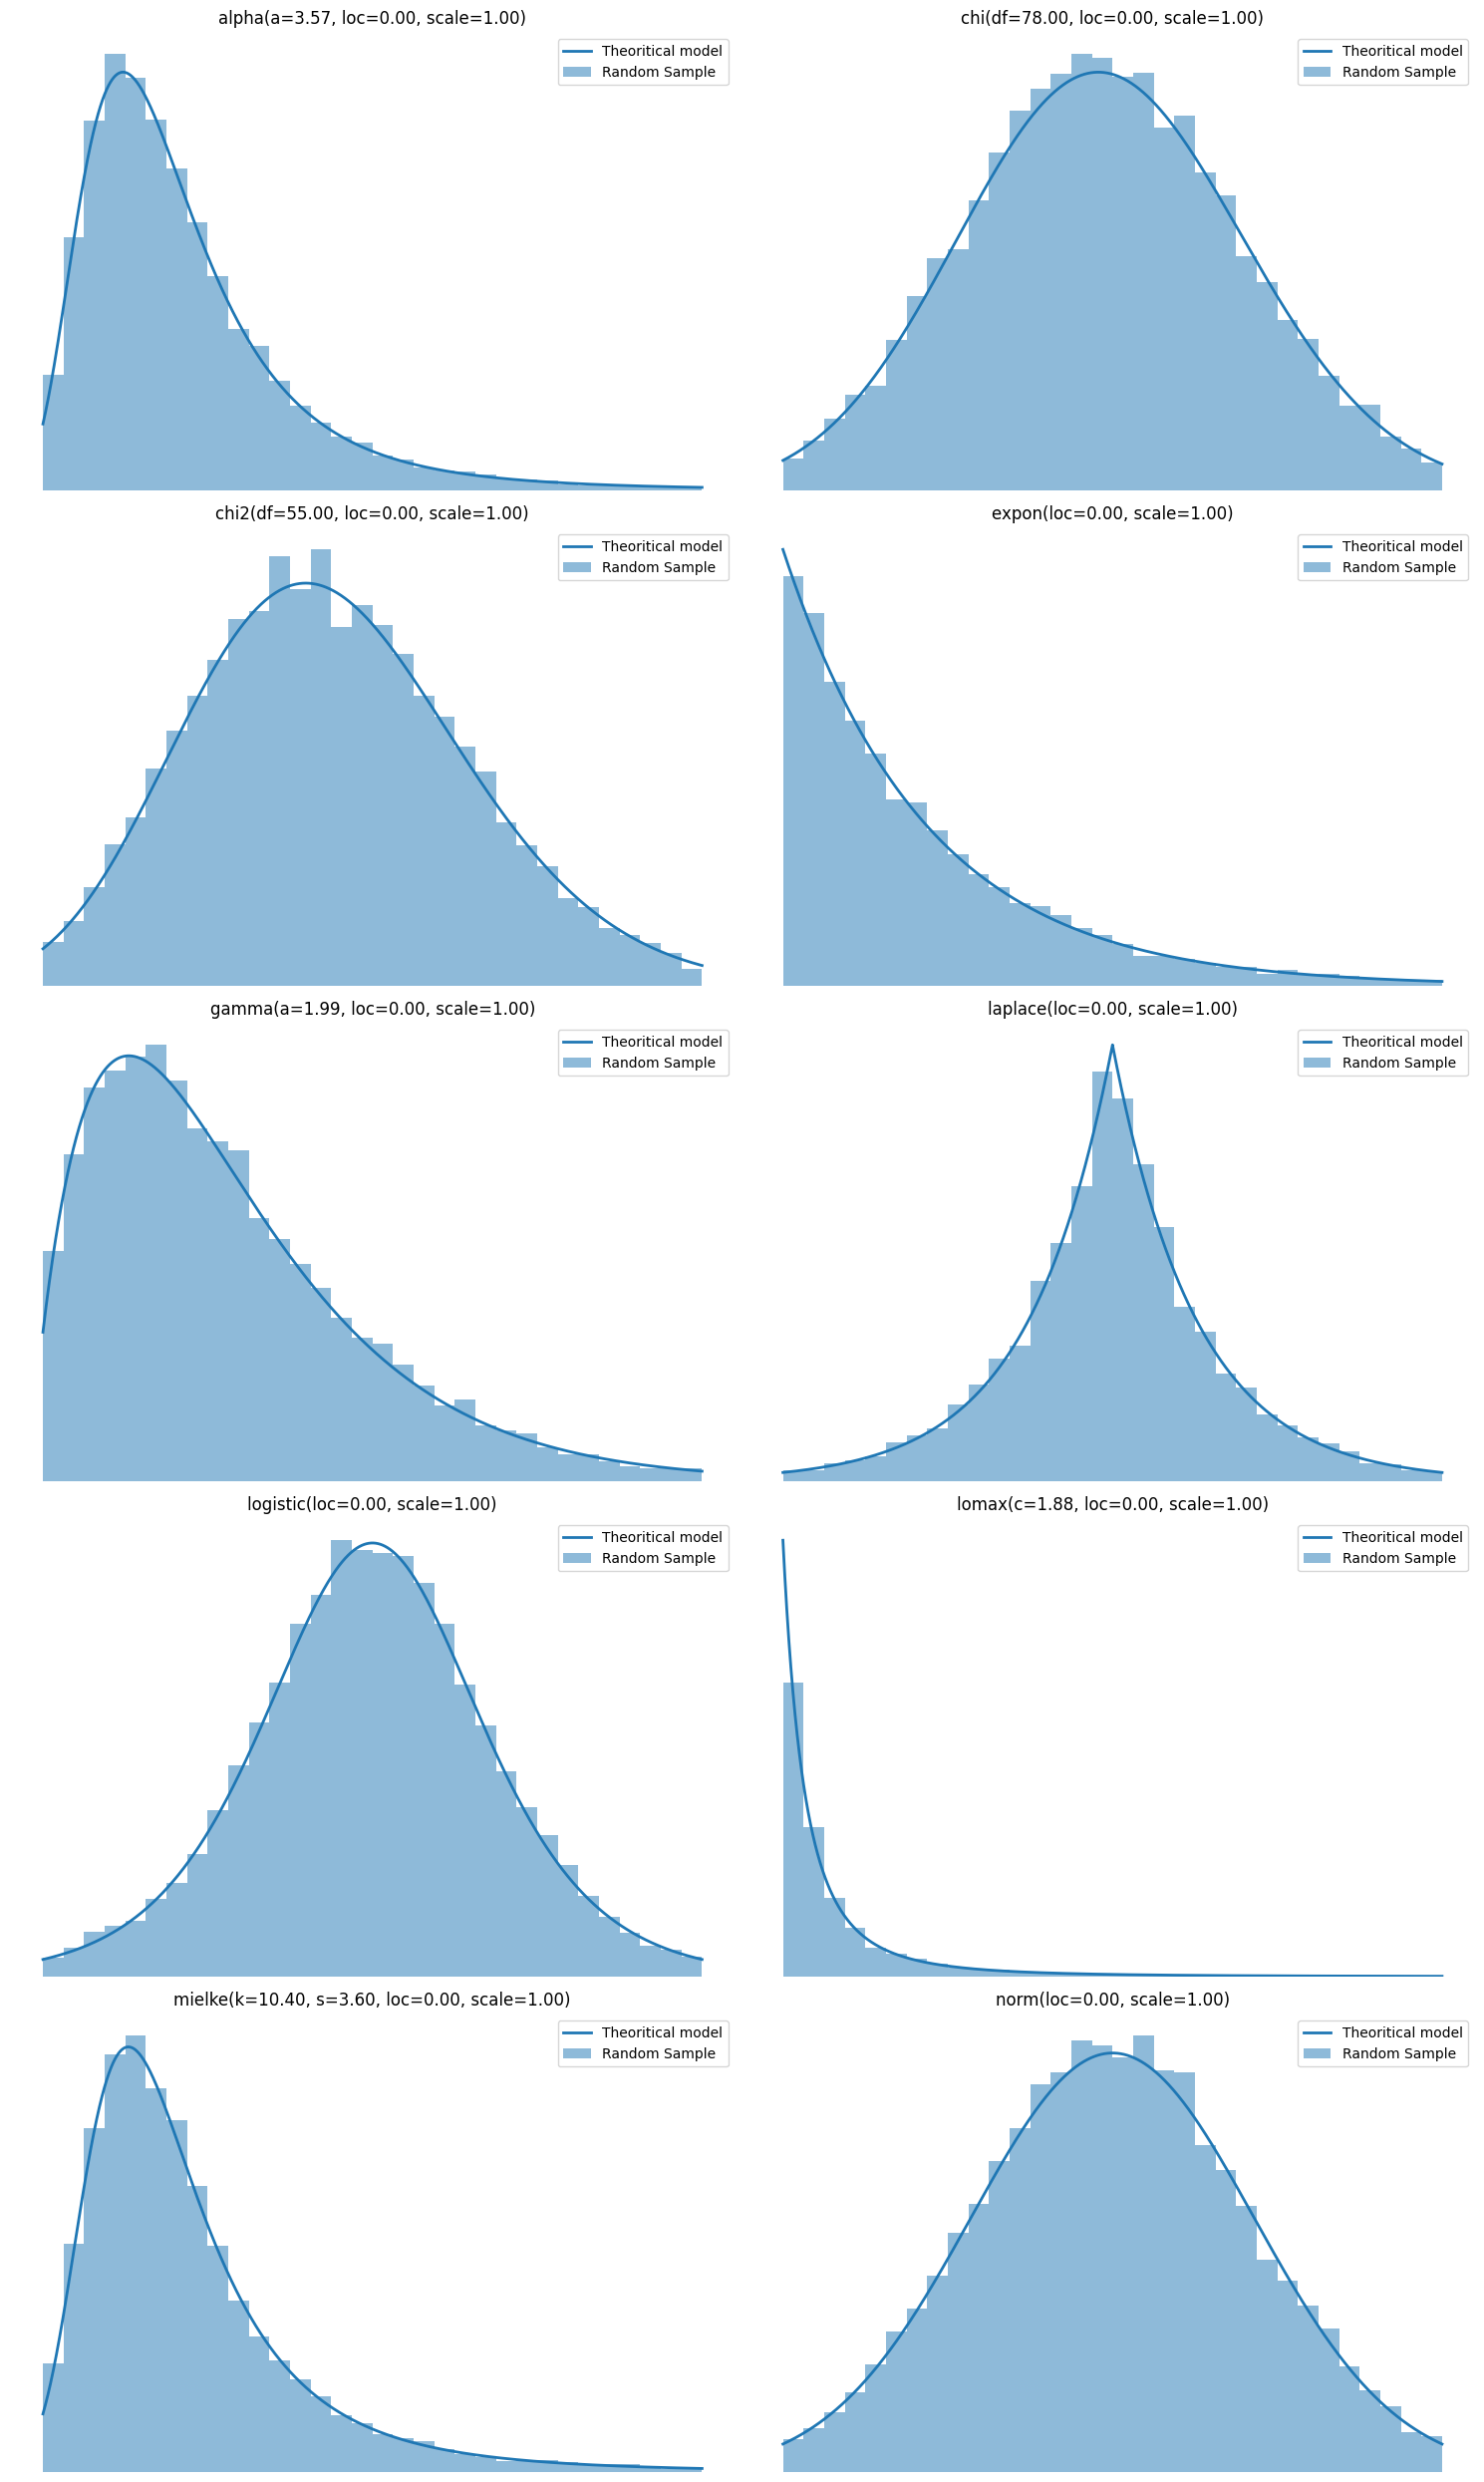

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

DISTRIBUTIONS = [
    stats.alpha(a=3.57, loc=0.0, scale=1.0),
    stats.chi(df=78, loc=0.0, scale=1.0),
    stats.chi2(df=55, loc=0.0, scale=1.0),
    stats.expon(loc=0.0, scale=1.0),
    stats.gamma(a=1.99, loc=0.0, scale=1.0),
    stats.laplace(loc=0.0, scale=1.0),
    stats.logistic(loc=0.0, scale=1.0),
    stats.lomax(c=1.88, loc=0.0, scale=1.0),
    stats.mielke(k=10.4, s=3.6, loc=0.0, scale=1.0),
    stats.norm(loc=0.0, scale=1.0),
]

bins = 32
size = 16384
plotData = []

for distribution in DISTRIBUTIONS:
    try:
        rv = pd.Series(distribution.rvs(size=size))
        start = distribution.ppf(0.01)
        end = distribution.ppf(0.99)

        x = np.linspace(start, end, size)
        y = distribution.pdf(x)
        pdf = pd.Series(y, x)

        b = np.linspace(start, end, bins+1)
        y, x = np.histogram(rv, bins=b, density=True) 
        x = [(a+x[i+1])/2.0 for i, a in enumerate(x[0:-1])]
        hist = pd.Series(y, x)

        title = '{}({})'.format(distribution.dist.name, ', '.join(
            ['{}={:0.2f}'.format(k, v) for k, v in distribution.kwds.items()]))

        plotData.append({
            'pdf': pdf,
            'hist': hist,
            'title': title
        })

    except Exception as e:
        print(f'could not create data for {distribution.dist.name}: {e}')

n_plots = len(plotData)
n_cols = 2
n_rows = (n_plots + 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

for i, data in enumerate(plotData):
    ax = axes[i // n_cols, i % n_cols]
    w = abs(abs(data['hist'].index[0]) - abs(data['hist'].index[1]))

    data['pdf'].plot(kind='line', label='Theoritical model', legend=True, lw=2, ax=ax)
    ax.bar(data['hist'].index, data['hist'].values,
           label='Random Sample', width=w, align='center', alpha=0.5)
    ax.set_title(data['title'])
    ax.legend()
    ax.axis('off')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])


plt.tight_layout()
plt.show()

### Expected value
Symbolized as E(X), is often referred to as the long-term average. This means that over the long term of doing an experiment over and over, you would expect this average.
$$E(X)=\sum xP(X)$$

Knowing values and it's probabilities, we can calculate expected value

In [32]:
values = [0, 1, 2, 3, 4]
probs = [.1, .2, .3, .4, .5]

def expectedValue(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return np.sum(values * weights)

print(f"Expected value for this data is: {expectedValue(values, probs)}")

Expected value for this data is: 4.0


### Standard Deviation

**Standard deviation** is a measure that quantifies the amount of variation or dispersion in a set of data values. It indicates how much the individual data points deviate from the mean (average) value of the dataset.

- **Low standard deviation**: The data points are clustered closely around the mean, showing little variability.
- **High standard deviation**: The data points are spread out over a wider range, indicating greater variability.

In essence, standard deviation helps you understand how consistent or dispersed the data is relative to the average value.


For discrete values:
$$\sigma ={\sqrt {{\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}},{\text{ where }}\mu ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$

For continous values:
$$\sigma ={\sqrt {\int _{\mathbf {X} }(x-\mu )^{2}\,p(x)\,\mathrm {d} x}},{\text{ where }}\mu =\int _{\mathbf {X} }x\,p(x)\,\mathrm {d} x$$

But in Python, we can do this easily with NumPy:

In [7]:
standardDeviation = np.std(values)
standardDeviation

1.4142135623730951

### Covariance

**Covariance** is a measure of the relationship between two random variables. It indicates the direction of the linear relationship between these variables, showing whether they tend to increase or decrease together.

- If both variables tend to increase or decrease together, the **covariance is positive**, indicating a direct relationship.
- If one variable tends to increase when the other decreases (and vice versa), the **covariance is negative**, indicating an inverse relationship.

In simpler terms, covariance helps us understand how changes in one variable are associated with changes in another.

Interpretation:
- **Positive covariance**: Both variables move in the same direction (when one increases, the other tends to increase as well).
- **Negative covariance**: The variables move in opposite directions (when one increases, the other tends to decrease).
- **Zero covariance**: There is no consistent relationship between the variables.

Example:
Consider two random variables: stock prices and company revenue. If the stock price increases when the company's revenue increases, the covariance between the two would be positive, indicating a direct relationship. Conversely, if stock prices fall when revenue rises, the covariance would be negative.


$$\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}$$

$$\displaystyle \operatorname {cov} (X,Y)=\operatorname {E} [XY] - \operatorname {E} [X] \operatorname {E} [Y]$$

Again, we can use simple Python code:

In [31]:
x = np.random.normal(size=(1,10))
y = np.random.normal(size=(1,10))

cov = np.cov(x,y)
# returns covariance matrix
cov

array([[ 0.69268831, -0.24453369],
       [-0.24453369,  1.01221478]])

### Correlation and how to interpret it

Correlation is relationship between data. In this study case, we will look up Pearson correlation coefficent, which is most basic type of correlation in statistics.

Pearson correlation coefficent measures linear correlation between two sets of data. In other words, how closely the data falls in a straight line.

$${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$$

The correlation coefficient ranges from −1 to 1. An absolute value of exactly 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line. The correlation sign is determined by the regression slope: a value of +1 implies that all data points lie on a line for which Y increases as X increases, whereas a value of -1 implies a line where Y increases while X decreases. A value of 0 implies that there is no linear dependency between the variables.


A positive correlation example is the relationship between the speed of a wind turbine and the amount of energy it produces. As the turbine speed increases, electricity production also increases.

A negative correlation example is the relationship between outdoor temperature and heating costs. As the temperature increases, heating costs decrease.


In [23]:
x = [1,2,3,4]
z = [4,3,2,1]

corr1 = stats.pearsonr(x,x)
# correlation = 1
print(f"Correlation for same data, according to theory above, is equal {corr1[0]:.2f}")
corr2 = stats.pearsonr(x,z)
# correlation = -1
print(f"Correlation for exactly oposit data, according to theory above, is equal {corr2[0]:.2f}")

Correlation for same data, according to theory above, is equal 1.00
Correlation for oposit data, according to theory above, is equal -1.00


##### Sampling